In [ ]:
!pip install scipy==1.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.insert(0,'/content/drive/My Drive/CS523/Project/face_classification/src')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/CS523/Project/face_classification/src

In [ ]:
import cv2
#from keras.models import load_model
from keras.models import *
#if having problem with importing, try to re-run this cell several times
import numpy as np

from utils.datasets import get_labels
from utils.inference import detect_faces
from utils.inference import draw_text
from utils.inference import draw_bounding_box
from utils.inference import apply_offsets
from utils.inference import load_detection_model
from utils.inference import load_image
from utils.preprocessor import preprocess_input
from utils.datasets import DataManager
from utils.datasets import split_data
from utils.preprocessor import preprocess_input

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# parameters for loading data and images
emotion_model_path = '../trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5'
# emotion_model_path = '../trained_models/model_training_experiments/fer2013_mini_XCEPTION.74-0.66.hdf5'
# emotion_model_path = '../trained_models/reduced_modules_experiments_2/fer2013_mini_XCEPTION.100-0.51.hdf5'
# emotion_model_path = '../trained_models/reduced_modules_experiments_3/fer2013_mini_XCEPTION.93-0.53.hdf5'
# emotion_model_path = '../trained_models/increased_modules_experiments_5/fer2013_mini_XCEPTION.60-0.66.hdf5'
emotion_labels = get_labels('fer2013')
gender_labels = get_labels('imdb')
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
datasets = ['fer2013']

data_loader = DataManager("fer2013", image_size=input_shape[:2])
faces, emotions = data_loader.get_data()
faces = preprocess_input(faces)
num_samples, num_classes = emotions.shape
train_data, val_data = split_data(faces, emotions, validation_split)
train_faces, train_emotions = train_data
val_faces, val_emotions = val_data

Original Model

In [ ]:
emotion_model_path = '../trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5'
emotion_classifier = load_model(emotion_model_path, compile=False)
y_pred = emotion_classifier(val_faces)
y_pred = y_pred.numpy()

y_pred_p = []
val_emotions_p = []

for i in range(len(y_pred)):
  m = np.argmax(y_pred[i])
  y_pred_p.append(m)

for i in range(len(val_emotions)):
  m = np.argmax(val_emotions[i])
  val_emotions_p.append(m)

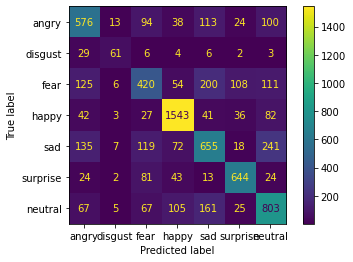

In [ ]:
#cm = confusion_matrix(val_emotions, y_pred, normalize='all')
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

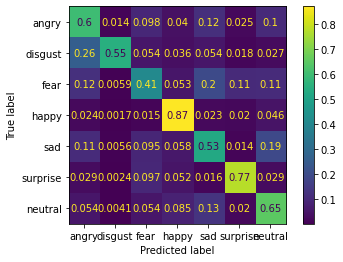

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

Model with 2 modules

In [ ]:
emotion_model_path = '../trained_models/reduced_modules_experiments_2/fer2013_mini_XCEPTION.100-0.51.hdf5'
emotion_classifier = load_model(emotion_model_path, compile=False)
y_pred = emotion_classifier(val_faces)
y_pred = y_pred.numpy()

y_pred_p = []
val_emotions_p = []

for i in range(len(y_pred)):
  m = np.argmax(y_pred[i])
  y_pred_p.append(m)

for i in range(len(val_emotions)):
  m = np.argmax(val_emotions[i])
  val_emotions_p.append(m)

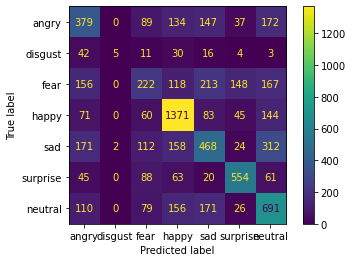

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

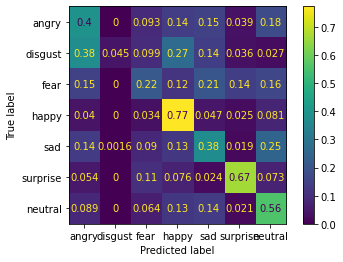

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

3 Modules

In [ ]:
emotion_model_path = '../trained_models/reduced_modules_experiments_3/fer2013_mini_XCEPTION.93-0.53.hdf5'
emotion_classifier = load_model(emotion_model_path, compile=False)
y_pred = emotion_classifier(val_faces)
y_pred = y_pred.numpy()

y_pred_p = []
val_emotions_p = []

for i in range(len(y_pred)):
  m = np.argmax(y_pred[i])
  y_pred_p.append(m)

for i in range(len(val_emotions)):
  m = np.argmax(val_emotions[i])
  val_emotions_p.append(m)

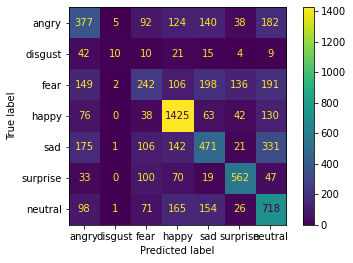

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

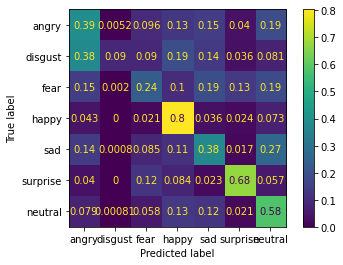

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

Model with 4 modules trained by us

In [ ]:
emotion_model_path = '../trained_models/model_training_experiments/fer2013_mini_XCEPTION.74-0.66.hdf5'
emotion_classifier = load_model(emotion_model_path, compile=False)
y_pred = emotion_classifier(val_faces)
y_pred = y_pred.numpy()

y_pred_p = []
val_emotions_p = []

for i in range(len(y_pred)):
  m = np.argmax(y_pred[i])
  y_pred_p.append(m)

for i in range(len(val_emotions)):
  m = np.argmax(val_emotions[i])
  val_emotions_p.append(m)

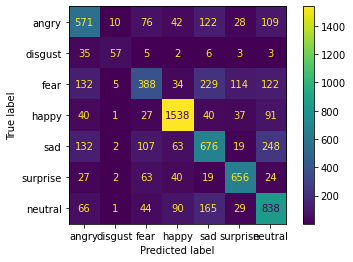

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

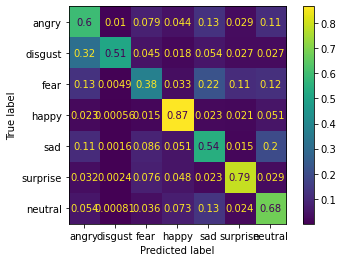

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

Model with 5 modules

In [ ]:
emotion_model_path = '../trained_models/increased_modules_experiments_5/fer2013_mini_XCEPTION.60-0.66.hdf5'
emotion_classifier = load_model(emotion_model_path, compile=False)
y_pred = emotion_classifier(val_faces)
y_pred = y_pred.numpy()

y_pred_p = []
val_emotions_p = []

for i in range(len(y_pred)):
  m = np.argmax(y_pred[i])
  y_pred_p.append(m)

for i in range(len(val_emotions)):
  m = np.argmax(val_emotions[i])
  val_emotions_p.append(m)

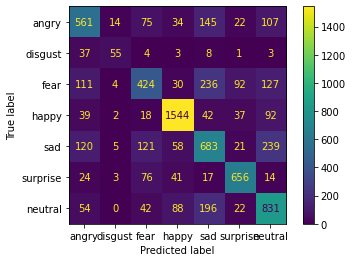

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()

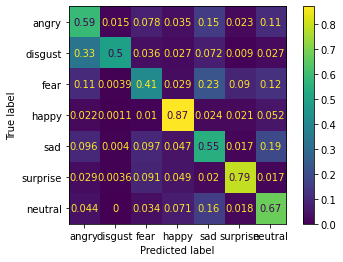

In [ ]:
cm = confusion_matrix(val_emotions_p, y_pred_p, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
cmd.plot()